In [1]:
from csv import reader
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

plt.style.use('ggplot')  
plt.rcParams['figure.figsize'] = (15, 5) 

Сегодня у нас Обучение в ускоренном формате, проведет Саша, джуниор, длительностью 130 минут и расскажет о том как рассчитываются налоги
Если Вы получили доход в размере 12, должны уплатить налог в размере 1.56
Если Вы получили доход в размере 26, должны уплатить налог в размере 3.38
Если Вы получили доход в размере 43, должны уплатить налог в размере 5.59
Если Вы получили доход в размере 54, должны уплатить налог в размере 7.0200000000000005


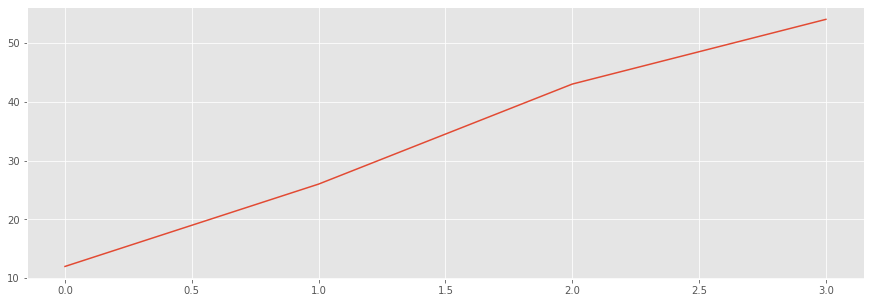

In [2]:
intensive = "Обучение в ускоренном формате"
duration = "130 минут"
speaker = "Саша"
profession = "джуниор"
whois = speaker + ", " + profession
print(f"Сегодня у нас {intensive}, проведет {whois}, длительностью {duration} и расскажет о том как рассчитываются налоги")

income = [12,26,43,54]
for i in income:
    tax = 0.13 * i
    print(f"Если Вы получили доход в размере {i}, должны уплатить налог в размере {tax}")
    
plt.plot(income)
plt.show()

In [3]:
def explore_data(dataset, start, end, rows_and_columns=False):
    """
    Function for showing the list of lists primary stats:    
    """
    dataset_slice = dataset[start:end]    
    for row in dataset_slice:
        print(row)
        print('\n') 

    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))
        

def eng_check(string):
    """
    Function for clearing LoL from NOT english rows (string names are checked 4 only english encryption) 
    """
    x=0
    for character in string:        
        if ord(character) > 127:
            x += 1
    if x > 3:
        return False        
    else:
        return True
    
    
def freq_table(dataset, index):
    """"
    Function 4 examine the rating of popularity of value inside LoL
    """
    table = {}
    total = 0
    
    for row in dataset:
        total += 1
        value = row[index]
        if value in table:
            table[value] += 1
        else:
            table[value] = 1
    
    table_percentages = {}
    for key in table:
        percentage = (table[key] / total) * 100
        table_percentages[key] = percentage 
    
    return table_percentages

def display_table(dataset, index):
    """
    Final sorted LOL display
    """
    
    table = freq_table(dataset, index)
    table_display = []
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)
        
    table_sorted = sorted(table_display, reverse = True)
    for entry in table_sorted:
        print(entry[1], ':', round(entry[0], 2), "%")

In [4]:
opened_file = open('googleplaystore.csv', encoding='utf-8')
read_file = reader(opened_file)
android = list(read_file)
android_header = android[0]
android = android[1:]

In [5]:
for row in android:    
    if len(row) != len(android_header):
        print(android.index(row))     

del android[10472]

10472


In [6]:
unique_android = []
duplicate_android = []
for app in android:
    check_name = app[0]
    if check_name in unique_android:
        duplicate_android.append(check_name)
    else:
        unique_android.append(check_name)
        
print("Оригинальных приложений Google: ", len(unique_android))
print("Дублирующихся строк Google: ", len(duplicate_android))        

Оригинальных приложений Google:  9659
Дублирующихся строк Google:  1181


In [7]:
reviews_max = {}
for app in android:
    name = app[0]
    n_reviews = float(app[3])
    if name in reviews_max and reviews_max[name] < n_reviews:
        reviews_max[name] = n_reviews
    elif name not in reviews_max:
        reviews_max[name] = n_reviews

print("Всего строк в словаре Google: ", len(reviews_max))

android_clean = []
android_added = []
for app in android:
    name = app[0]
    n_reviews = float(app[3])   
    if (reviews_max[name] == n_reviews) and (name not in android_added):
        android_clean.append(app)
        android_added.append(name)

print("Всего строк в очищенном листе Google: ", len(android_clean))        

Всего строк в словаре Google:  9659
Всего строк в очищенном листе Google:  9659


In [8]:
print(eng_check('Docs To Go™ Free Office Suite'))
print(eng_check('Instachat 😜'))
print(eng_check('爱奇艺PPS -《欢乐颂2》电视剧热播'))          

True
True
False


In [9]:
android_free = []
android_non_free = []
for app in android_clean:
    name = app[0]
    n_price = app[7]   
    if n_price == "0":
        android_free.append(app)
    else:
        android_non_free.append(app)

print("Бесплатных приложений Google: ", len(android_free))
print("Платных приложений Google: ", len(android_non_free))

Бесплатных приложений Google:  8905
Платных приложений Google:  754


In [10]:
android_eng_only = []
for app in android_free:
    name = app[0]
    if eng_check(name):
        android_eng_only.append(app) 
        
print("Бесплатных английских приложений Google: ", len(android_eng_only))    

Бесплатных английских приложений Google:  8864


In [11]:
popular_app_android = {}

for app in android_eng_only:
    genre = app[1]
    if genre in popular_app_android:
        popular_app_android[genre] += 1
    else:
        popular_app_android[genre]  = 1

print(popular_app_android)  
        

{'ART_AND_DESIGN': 57, 'AUTO_AND_VEHICLES': 82, 'BEAUTY': 53, 'BOOKS_AND_REFERENCE': 190, 'BUSINESS': 407, 'COMICS': 55, 'COMMUNICATION': 287, 'DATING': 165, 'EDUCATION': 103, 'ENTERTAINMENT': 85, 'EVENTS': 63, 'FINANCE': 328, 'FOOD_AND_DRINK': 110, 'HEALTH_AND_FITNESS': 273, 'HOUSE_AND_HOME': 73, 'LIBRARIES_AND_DEMO': 83, 'LIFESTYLE': 346, 'GAME': 862, 'FAMILY': 1676, 'MEDICAL': 313, 'SOCIAL': 236, 'SHOPPING': 199, 'PHOTOGRAPHY': 261, 'SPORTS': 301, 'TRAVEL_AND_LOCAL': 207, 'TOOLS': 750, 'PERSONALIZATION': 294, 'PRODUCTIVITY': 345, 'PARENTING': 58, 'WEATHER': 71, 'VIDEO_PLAYERS': 159, 'NEWS_AND_MAGAZINES': 248, 'MAPS_AND_NAVIGATION': 124}


In [12]:
final_android = display_table(android_eng_only, 1)
print(final_android)    

FAMILY : 18.91 %
GAME : 9.72 %
TOOLS : 8.46 %
BUSINESS : 4.59 %
LIFESTYLE : 3.9 %
PRODUCTIVITY : 3.89 %
FINANCE : 3.7 %
MEDICAL : 3.53 %
SPORTS : 3.4 %
PERSONALIZATION : 3.32 %
COMMUNICATION : 3.24 %
HEALTH_AND_FITNESS : 3.08 %
PHOTOGRAPHY : 2.94 %
NEWS_AND_MAGAZINES : 2.8 %
SOCIAL : 2.66 %
TRAVEL_AND_LOCAL : 2.34 %
SHOPPING : 2.25 %
BOOKS_AND_REFERENCE : 2.14 %
DATING : 1.86 %
VIDEO_PLAYERS : 1.79 %
MAPS_AND_NAVIGATION : 1.4 %
FOOD_AND_DRINK : 1.24 %
EDUCATION : 1.16 %
ENTERTAINMENT : 0.96 %
LIBRARIES_AND_DEMO : 0.94 %
AUTO_AND_VEHICLES : 0.93 %
HOUSE_AND_HOME : 0.82 %
WEATHER : 0.8 %
EVENTS : 0.71 %
PARENTING : 0.65 %
ART_AND_DESIGN : 0.64 %
COMICS : 0.62 %
BEAUTY : 0.6 %
None
